In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract as pyt
import math
import difflib
import warnings
warnings.filterwarnings("ignore")
pyt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## Essential Functions

In [2]:
# Function to visualise the image and to provide score of the words obtained from OCR
def generateImgAndScore(Img, ImgNum, ActualImgText, AdditonalRemarks):
    # Tesseract OCR; Blacklist unwanted symbols
    imgString = pyt.image_to_string(Img, config = r'-c tessedit_char_blacklist=_| ').strip()
    
    print("Generated from OCR:")
    print(imgString)
    
    # Use SequenceMatcher to provide the score
    diffRatio = difflib.SequenceMatcher(None, ActualImgText, imgString)
    print(f"\nGenerated Score: {round(diffRatio.ratio()*100, 3)}%")
    
    if ImgNum == 1:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(7,7))
    
    plt.imshow(Img, cmap = 'gray')
    plt.title(f'Image {ImgNum} - {AdditonalRemarks}')

## Image Enhancement Functions

In [3]:
# Function to perform contrast stretching
def contrastStretching(img):
    minPixel = img.min()
    maxPixel = img.max()
    
    P1 = np.subtract(img, minPixel)
    P2 = np.multiply(P1, 255/(maxPixel - minPixel))

    return P2.astype(np.uint8) # Convert to uint8

# Function to perform Otsu thresholding
def otsuThresholding(img):
    # Get the number of frequencies at each pixel value
    hist, bins = np.histogram(img, np.array(range(0, 256)))
    bins = np.delete(bins, 0) # Delete the first bin as the length is at 256
    
    # Obtain the probability histogram
    prob = hist/sum(hist)
    
    # Initialise variables
    optimal = 0
    minIntraClassVariance = math.inf;
    
    for i in range(0, len(bins)):
        # First, obtain the upper and lower group probability
        lowerProb = np.sum(prob[0:i+1])
        higherProb = np.sum(prob[i:len(bins)])
        
        # Will be used for summation in finding group mean and variance
        lowerBound = bins[0:i+1]
        upperBound = bins[i:len(bins)]
        
        # Next, obtain the upper and lower group mean
        lowerMean = (1/lowerProb) * (np.sum(lowerBound * prob[0:i+1]))
        upperMean = (1/higherProb) * (np.sum(upperBound * prob[i:len(bins)]))
        
        # Find upper and lower group variance
        lowerVariance = (1/lowerProb) * (np.sum(np.power(lowerBound - lowerMean, 2) * prob[0:i+1]))        
        upperVariance = (1/higherProb) * (np.sum(np.power(upperBound - upperMean, 2) * prob[i:len(bins)]))
        
        # Obtain intra-class variance
        intraClassVariance = lowerProb*lowerVariance + higherProb*upperVariance
        
        # Obtain the threshold
        if (intraClassVariance < minIntraClassVariance):
            minIntraClassVariance = intraClassVariance
            optimal = i
    
    # Generate image by changing the pixel values based on threshold
    finalImg = img.copy()
    finalImg[finalImg > optimal] = 255
    finalImg[finalImg < optimal] = 0
    
    # Return changed image and the threshold value
    return finalImg, optimal

# Function to divide the image 2 into 4 parts and to change the brightness of the pixels
def cutImg2(img):
    imgCopy = img.copy()
    for x in range(0, imgCopy.shape[0]):
        for y in range(0, imgCopy.shape[1]):
            if x>=190 and x<395:
                imgCopy[x, y] *= 1.1
            elif x>=395 and x<570:
                imgCopy[x, y] *= 1.6
            elif x>570:
                imgCopy[x, y] *= 2.5
    return imgCopy

## Get the Actual Paragraph of Words
Actual paragraph of words were manaually typed and stored in a text file.
The words that are read from the text file will be stored in a string.

In [4]:
# Read actual text from the image
f = open("result01_correct.txt", "r")
img1Text = f.read()
correctImg1Text = img1Text.replace('\n', ' ')

In [5]:
f = open("result02_correct.txt", "r")
img2Text = f.read()
correctImg2Text = img2Text.replace('\n', ' ')

## Read the 2 original images
Compare the performance of OCR on the original images with the actual paragraph of words.

### Image 1

Generated from OCR:
Parking: You may park anywhere on the ce
king. Keep in mind the carpool hours and park
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ )
that they may be invited or can accompany :
you adhere to our policy for the benefit of

Generated Score: 33.504%


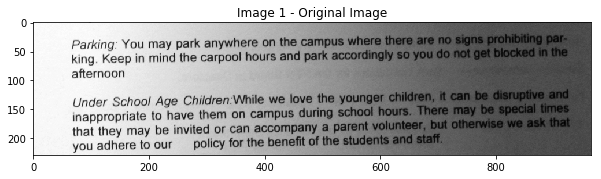

In [6]:
img1 = cv2.imread('sample01.png',0)
generateImgAndScore(img1, 1, correctImg1Text, "Original Image")

### Image 2

Generated from OCR:
Sonnet for Lena

Generated Score: 4.587%


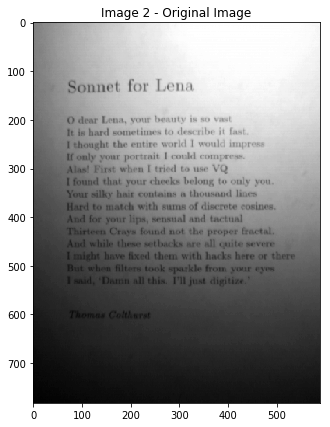

In [7]:
img2 = cv2.imread('sample02.png',0)
generateImgAndScore(img2, 2, correctImg2Text, "Original Image")

Image 2 is not performing very well as compared to image 1 on OCR, as only 3 correct words were obtained.

## Otsu Thresholding

Generated from OCR:
Parking: You may park anywhere on the cf
king. Keep in mind the carpool hours and p
afternoon

Under Schoo! Age Children:While we love q
inappropriate to have them on campus @
that they may be invited or can accompany
you adhere to our policy for the benefit

Generated Score: 33.075%
Threshold value: 126


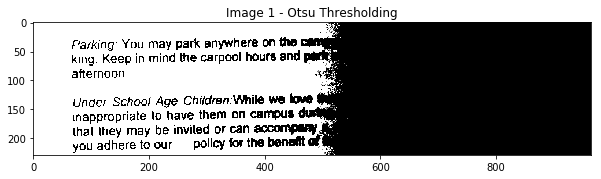

In [8]:
otsu1, thresh1 = otsuThresholding(img1)
generateImgAndScore(otsu1, 1, correctImg1Text, "Otsu Thresholding")

print("Threshold value:", thresh1)
# cv2.imwrite('sample01_otsu.png', otsu1) # Save image into the directory

In [9]:
# Image matrix
otsu1

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

Generated from OCR:
Sonnet for ler

Generated Score: 4.288%
Threshold value: 142


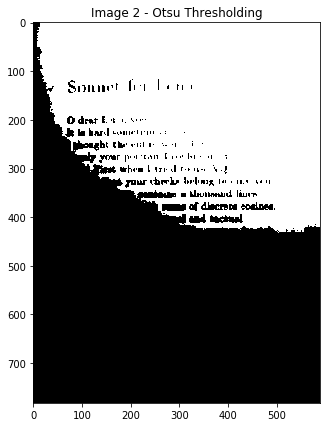

In [10]:
otsu2, thresh2 = otsuThresholding(img2)
generateImgAndScore(otsu2, 2, correctImg2Text, "Otsu Thresholding")

print("Threshold value:", thresh2)
# cv2.imwrite('sample02_otsu.png', otsu2)

Otsu thresholding does not seem to be effective for image 2.

## Contrast Stretching

0 255
Generated from OCR:
Parking: You may park anywhere on the cé
king. Keep in mind the carpool hours and p
afternoon

Under School Age Children:While we love tt
inappropriate to have them on campus d
that they may be invited or can accompany
you adhere to our policy for the benefit

Generated Score: 36.129%


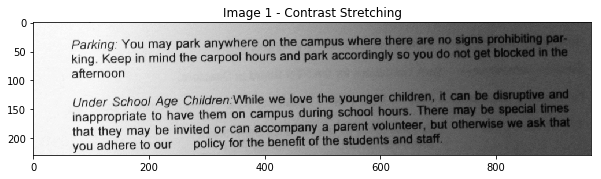

In [11]:
cs1 = contrastStretching(img1)
print(cs1.min(), cs1.max())
generateImgAndScore(cs1, 1, correctImg1Text, "Contrast Stretching")

# cv2.imwrite('sample01_cs.png', cs1)

0 255
Generated from OCR:
Sonnet for Lena

Generated Score: 4.587%


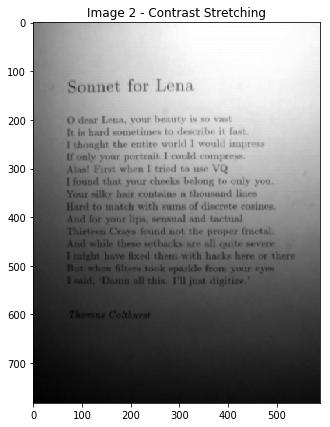

In [12]:
cs2 = contrastStretching(img2)
print(cs2.min(), cs2.max())
generateImgAndScore(cs2, 2, correctImg2Text, "Contrast Stretching")

# cv2.imwrite('sample02_cs.png', cs2)

Contrast stretching has a slightly better effect on image 1 in terms of performance in OCR as a slightly higher score is recorded. Image 2 under contrast stretching, on the other hand, performs the same as the original image.

## Canny Edge Detection
Attempt to do Canny Edge detection on both images to see if the OCR can perform better.

Generated from OCR:
Ee ecme (OMEN moe ene (oko MRCS I where there are no signs erehibi ng par
FM enn mck nUC ENS park acgordingly so you do not gel blocked iTamline)
Eiienneleg)

Under Schoo! Age Children: While we love the younger children, & can be disrusive and
inappropriate to have them on campus Ce oRsc COM ne ta mmlncnc Rina moe) special {mes
that they may be invited or can accompany & parent volunteer, but othennse we Fase nad
Ree ich koe mmm ma] Ponentcmtne hs Wccm sranckst ois

Generated Score: 0.406%


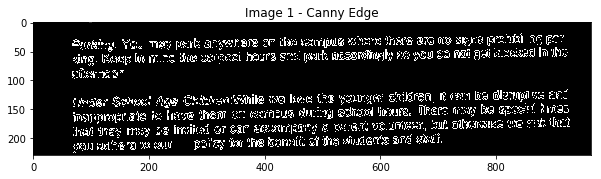

In [13]:
edges1 = cv2.Canny(img1,100,200)
generateImgAndScore(edges1, 1, correctImg1Text, "Canny Edge")

# cv2.imwrite('sample01_canny.png', edges1)

Generated from OCR:
FSV am a

Coe eC ey
See oe
es die ae a
en eae a Ras meee nnd
x oe ee ee
a ese ee ea)
Cn Ca
i a
en en

Generated Score: 11.367%


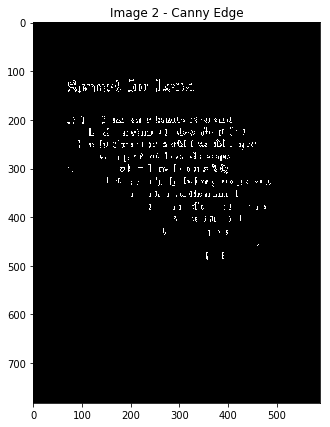

In [14]:
edges2 = cv2.Canny(img2,100,200)
generateImgAndScore(edges2, 2, correctImg2Text, "Canny Edge")

# cv2.imwrite('sample02_canny.png', edges2)

Canny Edge does not seem to help in generating the text from OCR as the output are not complete words in image 2.

## Adaptive Gaussian Thresholding

Generated from OCR:
appropriate. to.
“.that.they may be invited

Generated Score: 13.596%


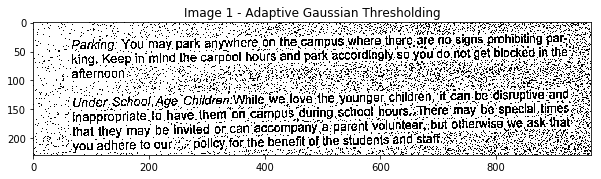

In [15]:
atg_img1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
generateImgAndScore(atg_img1, 1, correctImg1Text, "Adaptive Gaussian Thresholding")

Generated from OCR:
2) And for your Lipa, sensual and Anet
© hirderan Craya fainid nie

 

I might bave fixed ahem with hincks here or there: Tt
But. when filters took epaztdle from your eyes

Generated Score: 33.333%


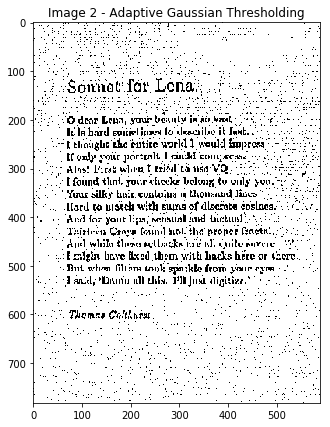

In [16]:
atg_img2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
generateImgAndScore(atg_img2, 2, correctImg2Text, "Adaptive Gaussian Thresholding")

The effect from this technique caused both images to have a lot of noise in the image.

## Medium Blur and Otsu Thresholding to Improve Image 1

Generated from OCR:
Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get biocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our policy for the benefit of the students and staff.

Generated Score: 98.45%
Threshold value: 146


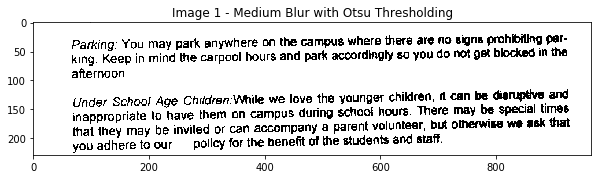

In [17]:
secMedianBlurImg1 = cv2.medianBlur(img1, 61)

MBDivideImg1 = np.ma.divide(img1, secMedianBlurImg1).data
normaliseMBImg1 = np.uint8(255 * MBDivideImg1 / MBDivideImg1.max())

threshed_61, th = otsuThresholding(normaliseMBImg1)
generateImgAndScore(threshed_61, 1, correctImg1Text, "Medium Blur with Otsu Thresholding")

print("Threshold value:", th)
# cv2.imwrite('sample01_MB_thres61.png', threshed_61)

## Other Techniques to Improve Image 2

### Divide and Cut Image

Generated from OCR:
net for Lena

w Lena, your
d sometimes to describe it fa
the entire world 1 would impr:
portrait [ could

Generated Score: 25.572%


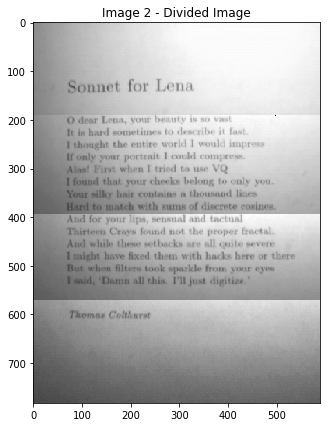

In [18]:
cutImg2 = cutImg2(img2)
generateImgAndScore(cutImg2, 2, correctImg2Text, "Divided Image")

### Put Divided Image to Medium Blur and Otsu

Generated from OCR:
Sonnet for Lena

OF dew: Lena, cir benuty in sa vant

I in bard soinetimes to deacribe it sat,

LT thonght Ube entire work! ] would impress
Tf only your portrait [ coukd compre.

Alas! Firat when I tried to use VQ

Tfound that your cheeks belong to only you.
Your silky hair contaion a tholsad lines
Hard to match with suns of discrete cosines.
And bor Uips. seusmad anil dae tual
Thirtcorn Craya found uot the proper fractal.
Acid while theee setbacks are all quite eevere
T giight bave fixed them with hecks bere or there
But when Alter took aparkle from your eyen
Vanid, ‘Daroo all this, I'll just digitize.”

 

Thomas Cottharst

Generated Score: 29.426%
Threshold value: 159


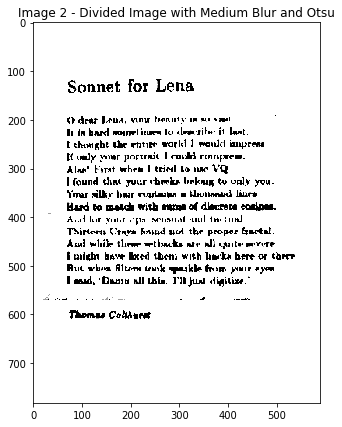

In [19]:
secMedianBlur_cutImg2 = cv2.medianBlur(cutImg2, 51)

divided_cutImg2 = np.ma.divide(cutImg2, secMedianBlur_cutImg2).data
normalised_cutImg2 = np.uint8(255 * divided_cutImg2 / divided_cutImg2.max())
OtsuNormed_cutImg2, thr = otsuThresholding(normalised_cutImg2)

generateImgAndScore(OtsuNormed_cutImg2, 2, correctImg2Text, "Divided Image with Medium Blur and Otsu")
print("Threshold value:", thr)

### Divided Image and Medium Blur Only

Generated from OCR:
Sonnet for Lena

O dear Lena, your beauty is so vast
It is hard sometimes to describe it fast,

I thought the entire world 1 would impress

If only your portrait [ could compress.

Alas! First when I tried to use VQ

I found that your cheeks belong to only you.
Your silky hair contains a thousand lines

Hard to match with sums of discrete cosines.
And for your lips, sensual and tactual

Thirteen Crays found not the proper fractal.
And while these setbacks are all quite severe

I might have fixed them with hacks here or there
But when filters took sparkle from your eyes

T said, ‘Damn all this, I'll just digitize.’

 

Thomas Colthurat

Generated Score: 81.655%


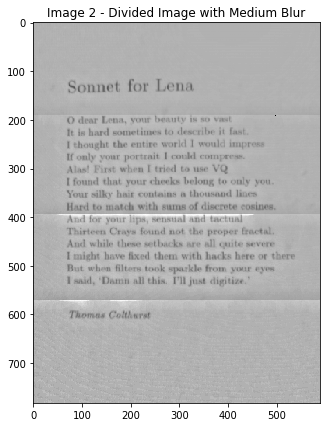

In [20]:
generateImgAndScore(normalised_cutImg2, 2, correctImg2Text, "Divided Image with Medium Blur")

# cv2.imwrite('sample02_divided and MB.png', normed_cutImg2)

### Resize Image, Do Medium Blur and Otsu

Threshold value: 200
Generated from OCR:
Sonnet for Lena

O dear Lena, vour heauty in so vast

It is bard sometimes to deacribe it fant.

I thonght the entire work! [ would impress
If only your portrait [ could comprens.

Alas! First when I tried to use VQ

1 found that your checks belong to only you.
Your silky bait contains a thousand lines
Hard to match with muma of discrete cosines.
And for your lipe, sensual and tactual
Thirteen Crays found not the proper fractal,
Amd while these setbacks are all quite severe
T oight bave fixed them with hacka bere or there
But when filters took sparkle from your eves
i anud, ‘Dann all this. I'll just digitize."

Thomas Colthurst

Generated Score: 64.207%


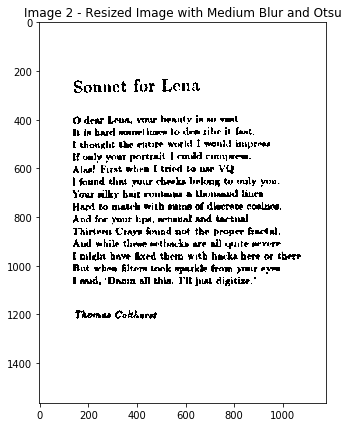

In [21]:
resizeImg2 = cv2.resize(img2, (img2.shape[1]*2, img2.shape[0]*2), interpolation = cv2.INTER_CUBIC)

secMedianBlur_resizedImg2 = cv2.medianBlur(resizeImg2, 51)

divided_resizedImg2 = np.ma.divide(resizeImg2, secMedianBlur_resizedImg2).data
normalised_resizedImg2 = np.uint8(255 * divided_resizedImg2 / divided_resizedImg2.max())
otsuAfterNorm_resizedImg2, thr = otsuThresholding(normalised_resizedImg2)

print("Threshold value:", thr)
generateImgAndScore(otsuAfterNorm_resizedImg2, 2, correctImg2Text, "Resized Image with Medium Blur and Otsu")

# cv2.imwrite('sample02_resize, MB and Otsu.png', otsuAfterNorm_resizedImg2)

### Resized Image and Medium Blur

Generated from OCR:
Sonnet for Lena

O dear Lena, your beauty is so vast

It is hard sometimes to describe it fast.

I thonght the entire world 1 would impress
If only your portrait [ could compress.

Alas! First when I tried to use VQ

I found that your checks belong to only you.
Your silky hair contains a thousand lines
Hard to match with sums of discrete cosines.
And for your lips, sensual and tactual
Thirteen Crays found not the proper fractal.
And while these setbacks are all quite severe
I might have fixed them with hacks here or there
But when filters took sparkle from your eves
I said, ‘Damn all this. I'll just digitize.’

Thomas Colthwrat

Generated Score: 95.133%


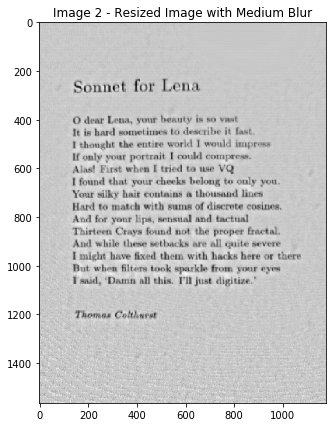

In [22]:
generateImgAndScore(normalised_resizedImg2, 2, correctImg2Text, "Resized Image with Medium Blur")

# cv2.imwrite('sample02_resize and MB.png', normed_resizedImg2)